# Implied Volatility

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120
import numpy as np

from volkit import implied_vol_euro_future
from volkit.datasets import spxw

In [33]:
# Read sample data, filter on 2 days till expiration

df = spxw(min_vol=1, D=2)

In [34]:
# Compute mid price of calls

# Get time-till-epiration, strike and underlying future price
T = df['T'].values
K = df['K'].values
F = (df['F_bid'].values[0] + df['F_ask'].values[0]) / 2

# Guess interest rate
r = 0.03

# Compute implied volatilies
iv_bid = implied_vol_euro_future( df['C_bid'] , F, K, T, r, cp=1)
iv_ask = implied_vol_euro_future( df['C_ask'], F, K, T, r, cp=1)
iv_mid = implied_vol_euro_future( (df['C_bid'] + df['C_ask'])/2, F, K, T, r, cp=1)

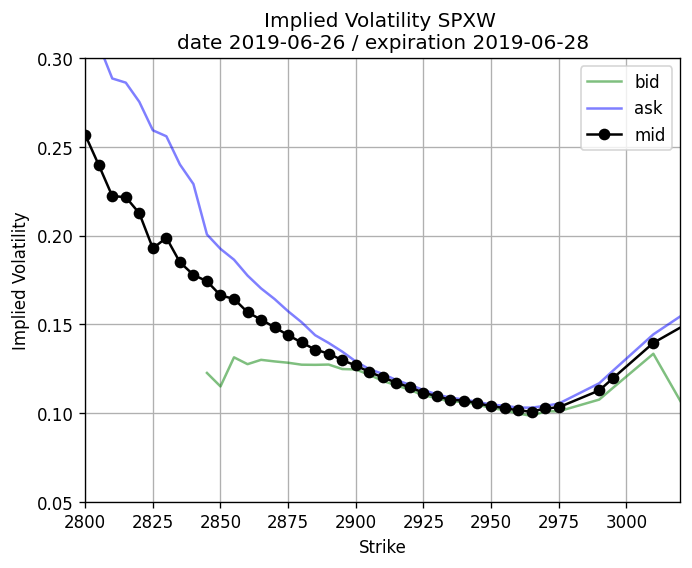

In [35]:
# Plot Implied Volatilties

plt.plot(K, iv_bid, 'g-', alpha=.5, label='bid')
plt.plot(K, iv_ask, 'b-', alpha=.5, label='ask')
plt.plot(K, iv_mid, 'ko-', label='mid')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility SPXW \ndate 2019-06-26 / expiration 2019-06-28')
plt.xlim(2800,3020)
plt.ylim(0.05, 0.3)
plt.legend()
plt.grid()
plt.show()